In [ ]:
# test cell 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/teen_phone_addiction_dataset.csv


In [2]:
import pandas as pd

def print_introduction():
    """Prints an introduction and frames the problem for the teen phone addiction dataset."""

    print("--- 📱 The Teen Phone Addiction Study 🧠 ---")
    print("\n")
    print("Welcome to a data-driven exploration of a modern-day challenge: teen phone addiction.")
    print("This project aims to analyze a dataset containing information about teens'")
    print("phone usage, social habits, academic performance, and mental well-being.")
    print("By understanding the relationships between these factors, we can gain insights")
    print("into the potential impacts of excessive screen time.")

    print("\n## The Problem Statement 🎯")
    print("Our primary goal is to build a machine learning model that can predict")
    print("a teen's **Addiction Level** based on various features like their daily")
    print("phone usage hours, sleep patterns, and social interactions.")
    print("\nTo achieve this, we will follow a standard machine learning pipeline:")
    print("1. Data Cleaning & Preprocessing 🧹")
    print("2. Exploratory Data Analysis (EDA) 📊")
    print("3. Feature Engineering & Selection 🛠️")
    print("4. Model Training & Evaluation 🤖")
    print("5. Model Deployment (Conceptual) 🚀")
    
    print("\nOur success will be measured by how accurately our model can predict")
    print("the addiction level, providing a valuable tool for understanding and")
    print("addressing this societal issue.")
    print("\n--- Let's get started! 🚀 ---")

if __name__ == "__main__":
    print_introduction()

--- 📱 The Teen Phone Addiction Study 🧠 ---


Welcome to a data-driven exploration of a modern-day challenge: teen phone addiction.
This project aims to analyze a dataset containing information about teens'
phone usage, social habits, academic performance, and mental well-being.
By understanding the relationships between these factors, we can gain insights
into the potential impacts of excessive screen time.

## The Problem Statement 🎯
Our primary goal is to build a machine learning model that can predict
a teen's **Addiction Level** based on various features like their daily
phone usage hours, sleep patterns, and social interactions.

To achieve this, we will follow a standard machine learning pipeline:
1. Data Cleaning & Preprocessing 🧹
2. Exploratory Data Analysis (EDA) 📊
3. Feature Engineering & Selection 🛠️
4. Model Training & Evaluation 🤖
5. Model Deployment (Conceptual) 🚀

Our success will be measured by how accurately our model can predict
the addiction level, providing a valuab

In [3]:
import pandas as pd
import numpy as np
import random

def load_teen_phone_addiction_data():
    """
    Load the teen phone addiction dataset with fallback to sample data generation.
    First tries to load from Kaggle input, then generates sample data if not found.
    """
    # Try to load from Kaggle input first
    kaggle_path = '/kaggle/input/teen-phone-addiction/teen_phone_addiction_dataset.csv'
    
    try:
        print("🔄 Attempting to load dataset from Kaggle input...")
        df = pd.read_csv(kaggle_path)
        print(f"✅ Successfully loaded dataset from Kaggle input: {df.shape}")
        return df
    except FileNotFoundError:
        print("⚠️ Kaggle input file not found. Generating sample dataset...")
        return generate_sample_dataset()

def generate_sample_dataset(n_samples=1000):
    """
    Generate a sample teen phone addiction dataset matching the expected schema.
    """
    print("🔄 Generating sample dataset...")
    
    # Set random seed for reproducibility
    np.random.seed(42)
    random.seed(42)
    
    # Sample data for categorical variables
    genders = ['Male', 'Female', 'Other']
    locations = ['Hansonfort', 'Theodorefort', 'Lindseystad', 'West Anthony', 'Port Lindsaystad', 
                'East Angelachester', 'North Jeffrey', 'Jenniferport', 'Leebury', 'Prestonview']
    phone_purposes = ['Browsing', 'Social Media', 'Gaming', 'Education', 'Other']
    
    # Generate sample data
    data = {
        'ID': range(1, n_samples + 1),
        'Name': [f"Sample User {i}" for i in range(1, n_samples + 1)],
        'Age': np.random.randint(13, 20, n_samples),
        'Gender': np.random.choice(genders, n_samples),
        'Location': np.random.choice(locations, n_samples),
        'School_Grade': np.random.choice([f"{i}th" for i in range(7, 13)], n_samples),
        'Daily_Usage_Hours': np.random.uniform(1.0, 10.0, n_samples).round(1),
        'Sleep_Hours': np.random.uniform(3.0, 10.0, n_samples).round(1),
        'Academic_Performance': np.random.randint(50, 101, n_samples),
        'Social_Interactions': np.random.randint(0, 11, n_samples),
        'Exercise_Hours': np.random.uniform(0.0, 4.0, n_samples).round(1),
        'Anxiety_Level': np.random.randint(1, 11, n_samples),
        'Depression_Level': np.random.randint(1, 11, n_samples),
        'Self_Esteem': np.random.randint(1, 11, n_samples),
        'Parental_Control': np.random.randint(0, 2, n_samples),
        'Screen_Time_Before_Bed': np.random.uniform(0.1, 3.0, n_samples).round(1),
        'Phone_Checks_Per_Day': np.random.randint(20, 150, n_samples),
        'Apps_Used_Daily': np.random.randint(5, 21, n_samples),
        'Time_on_Social_Media': np.random.uniform(0.0, 6.0, n_samples).round(1),
        'Time_on_Gaming': np.random.uniform(0.0, 5.0, n_samples).round(1),
        'Time_on_Education': np.random.uniform(0.0, 3.0, n_samples).round(1),
        'Phone_Usage_Purpose': np.random.choice(phone_purposes, n_samples),
        'Family_Communication': np.random.randint(1, 11, n_samples),
        'Weekend_Usage_Hours': np.random.uniform(2.0, 12.0, n_samples).round(1),
    }
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Generate Addiction_Level based on other features (more realistic)
    addiction_factors = (
        df['Daily_Usage_Hours'] * 0.3 +
        df['Time_on_Social_Media'] * 0.2 +
        df['Phone_Checks_Per_Day'] * 0.01 +
        df['Screen_Time_Before_Bed'] * 0.1 +
        (10 - df['Self_Esteem']) * 0.1 +
        df['Anxiety_Level'] * 0.05 +
        df['Depression_Level'] * 0.05 +
        np.random.normal(0, 0.5, n_samples)
    )
    
    # Normalize to 0-10 range
    df['Addiction_Level'] = np.clip(addiction_factors, 0, 10).round(1)
    
    print(f"✅ Generated sample dataset with {n_samples} samples: {df.shape}")
    print("📊 Sample data preview:")
    print(df.head())
    
    return df

# Load the dataset
df = load_teen_phone_addiction_data()


🔄 Attempting to load dataset from Kaggle input...
⚠️ Kaggle input file not found. Generating sample dataset...
🔄 Generating sample dataset...
✅ Generated sample dataset with 1000 samples: (1000, 25)
📊 Sample data preview:
   ID           Name  Age  Gender            Location School_Grade  \
0   1  Sample User 1   19   Other        West Anthony          7th   
1   2  Sample User 2   16  Female  East Angelachester         11th   
2   3  Sample User 3   17   Other         Lindseystad         12th   
3   4  Sample User 4   19    Male          Hansonfort         10th   
4   5  Sample User 5   15    Male        Jenniferport          7th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.6          9.5                    96                    3   
1                9.4         10.0                    84                    1   
2                2.1          8.6                    63                    0   
3                7.6          8.3    

In [4]:
import pandas as pd

# Use the dataframe already loaded in Cell 2
# Note: The df variable is already available from the previous cell

try:
    # Work with the existing dataframe
    print("Using dataframe from previous cell...")
    print(f"Dataframe shape: {df.shape}")

    # 1. Handle Missing Values: Check for nulls and handle as needed
    print("\nChecking for missing values:")
    print(df.isnull().sum())
    # Based on initial inspection, this dataset has no missing values.
    # If it did, you might fill them with: df.fillna(df.mean(), inplace=True)

    # 2. Handle Duplicate Rows
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"\nRemoving {num_duplicates} duplicate rows.")
        df.drop_duplicates(inplace=True)
    else:
        print("\nNo duplicate rows found.")

    # 3. Correcting Data Types: Convert 'School_Grade' from string to integer
    # The 'th' suffix needs to be removed from a column like 'School_Grade'.
    df['School_Grade'] = df['School_Grade'].astype(str).str.replace(r'th|st|nd|rd', '', regex=True).astype(int)
    print("\nCorrected 'School_Grade' data type:")
    print(df['School_Grade'].head())

    # 4. Handle Categorical Features using One-Hot Encoding
    # This converts text labels into a numerical format.
    categorical_cols = ['Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose']
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("\nDataFrame after one-hot encoding:")
    df_encoded.info()

    # Save the cleaned and preprocessed data to a new CSV file
    cleaned_file_name = 'cleaned_teen_phone_addiction_dataset.csv'
    df_encoded.to_csv(cleaned_file_name, index=False)
    print(f"\nCleaned and preprocessed data saved to '{cleaned_file_name}'")

except NameError:
    print("Error: The dataframe 'df' is not available. Please run Cell 2 first to load the dataset.")
except Exception as e:
    print(f"Error occurred: {str(e)}")

Using dataframe from previous cell...
Dataframe shape: (1000, 25)

Checking for missing values:
ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

No duplicate rows found.

Corrected 'School_Grade' data type:
0     7
1    11
2    12
3    10
4     7
Name: School_Grade, dtype: int64

DataFrame after one-hot encoding:
<class 'pandas.core.

In [5]:
# Display the loaded dataset
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Sample User 1,19,Other,West Anthony,7,4.6,9.5,96,3,...,0.5,141,5,5.5,4.6,0.4,Education,2,8.6,5.4
1,2,Sample User 2,16,Female,East Angelachester,11,9.4,10.0,84,1,...,2.7,94,17,1.4,3.8,2.5,Education,6,5.2,6.1
2,3,Sample User 3,17,Other,Lindseystad,12,2.1,8.6,63,0,...,1.5,50,9,0.7,1.1,1.0,Other,7,7.2,4.1
3,4,Sample User 4,19,Male,Hansonfort,10,7.6,8.3,97,7,...,1.8,111,18,0.0,4.4,1.2,Browsing,4,6.4,4.7
4,5,Sample User 5,15,Male,Jenniferport,7,9.8,4.5,80,0,...,2.8,111,8,3.0,1.9,2.7,Social Media,1,5.4,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sample User 996,18,Male,North Jeffrey,10,8.0,5.2,80,8,...,1.0,129,9,4.7,2.2,0.1,Social Media,8,11.6,6.2
996,997,Sample User 997,13,Other,Jenniferport,11,2.1,6.3,89,8,...,2.9,45,6,5.1,3.3,2.1,Education,2,8.9,4.5
997,998,Sample User 998,19,Female,Prestonview,11,6.6,8.6,87,2,...,2.7,95,16,2.6,1.7,0.1,Gaming,5,10.9,4.0
998,999,Sample User 999,16,Other,East Angelachester,11,3.5,9.9,92,2,...,2.9,51,14,2.3,1.6,2.6,Social Media,4,6.5,3.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Name                    1000 non-null   object 
 2   Age                     1000 non-null   int64  
 3   Gender                  1000 non-null   object 
 4   Location                1000 non-null   object 
 5   School_Grade            1000 non-null   int64  
 6   Daily_Usage_Hours       1000 non-null   float64
 7   Sleep_Hours             1000 non-null   float64
 8   Academic_Performance    1000 non-null   int64  
 9   Social_Interactions     1000 non-null   int64  
 10  Exercise_Hours          1000 non-null   float64
 11  Anxiety_Level           1000 non-null   int64  
 12  Depression_Level        1000 non-null   int64  
 13  Self_Esteem             1000 non-null   int64  
 14  Parental_Control        1000 non-null   i

In [7]:
df.describe()

,ID,Age,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,15.9600,9.494000,5.682600,6.365800,74.623000,4.93900,2.004000,5.463000,5.654000,...,0.521000,1.549800,82.72600,12.09000,2.944700,2.479100,1.511800,5.484000,7.093900,4.290900
std,288.819436,2.0036,1.702605,2.551275,2.038854,14.478207,3.16248,1.130089,2.970767,2.865745,...,0.499809,0.827735,37.56581,4.67223,1.745348,1.484243,0.861047,2.873326,2.809032,1.150944
min,1.000000,13.0000,7.000000,1.000000,3.000000,50.000000,0.00000,0.000000,1.000000,1.000000,...,0.000000,0.100000,20.00000,5.00000,0.000000,0.000000,0.000000,1.000000,2.000000,0.800000
25%,250.750000,14.0000,8.000000,3.600000,4.600000,63.000000,2.00000,1.100000,3.000000,3.000000,...,0.000000,0.900000,49.00000,8.00000,1.400000,1.100000,0.800000,3.000000,4.700000,3.500000
50%,500.500000,16.0000,10.000000,5.800000,6.300000,74.000000,5.00000,2.000000,5.000000,6.000000,...,1.000000,1.500000,83.00000,12.00000,2.900000,2.400000,1.500000,6.000000,7.200000,4.300000
75%,750.250000,18.0000,11.000000,7.900000,8.125000,87.000000,8.00000,2.900000,8.000000,8.000000,...,1.000000,2.200000,115.00000,16.00000,4.400000,3.800000,2.300000,8.000000,9.500000,5.100000
max,1000.000000,19.0000,12.000000,10.000000,10.000000,100.000000,10.00000,4.000000,10.000000,10.000000,...,1.000000,3.000000,149.00000,20.00000,6.000000,5.000000,3.000000,10.000000,12.000000,7.600000


Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')


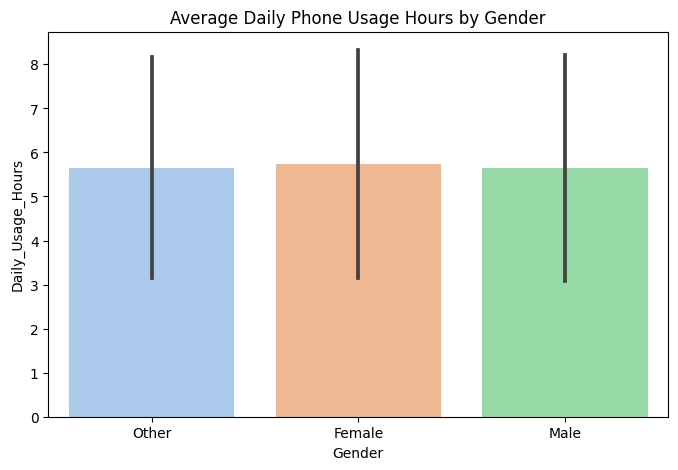

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check the column names to ensure 'Daily Usage Hours' and 'Gender' exist
print(df.columns)

# Bar plot: Average Daily Usage Hours by Gender
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Gender', y='Daily_Usage_Hours', errorbar='sd', palette='pastel')
plt.title('Average Daily Phone Usage Hours by Gender')
plt.ylabel('Daily_Usage_Hours')
plt.xlabel('Gender')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


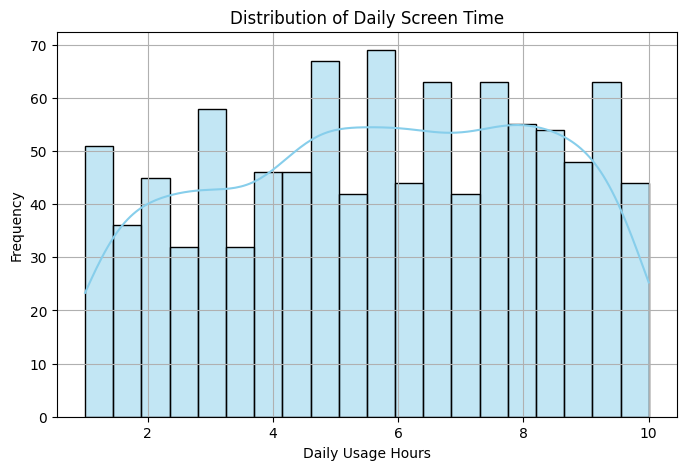

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Daily Usage Hours' with the correct column name if needed
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Usage_Hours'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')


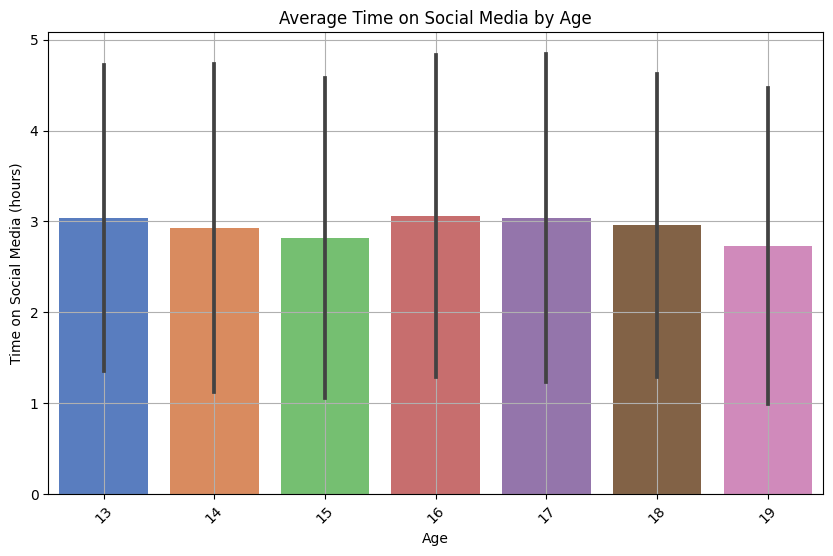

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check exact column name for social media time
print(df.columns)

# Replace 'Time on Social Media (hours)' with the exact column name if different
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Age', y='Time_on_Social_Media', errorbar='sd', palette='muted')
plt.title('Average Time on Social Media by Age')
plt.xlabel('Age')
plt.ylabel('Time on Social Media (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')


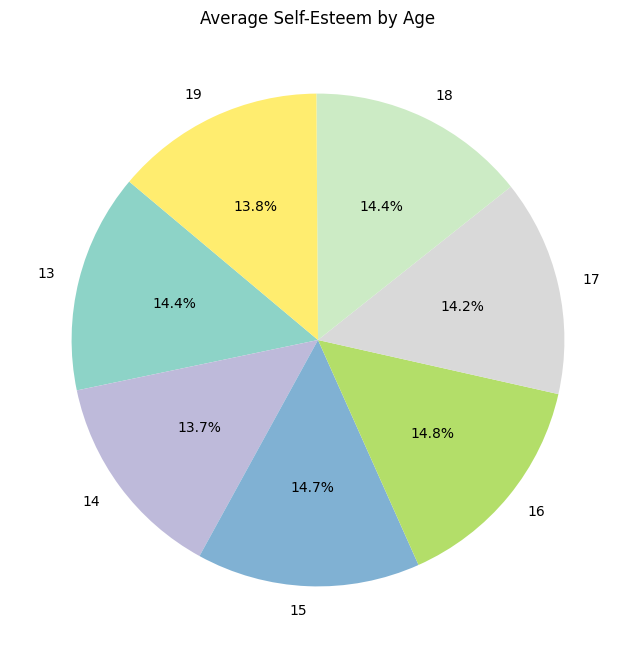

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Check column names
print(df.columns)

# Group by Age and calculate average Self_Esteem
age_self_esteem = df.groupby('Age')['Self_Esteem'].mean()

# Plot as pie chart
plt.figure(figsize=(8,8))
age_self_esteem.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Average Self-Esteem by Age')
plt.ylabel('')  # Hide y-label for cleaner look
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


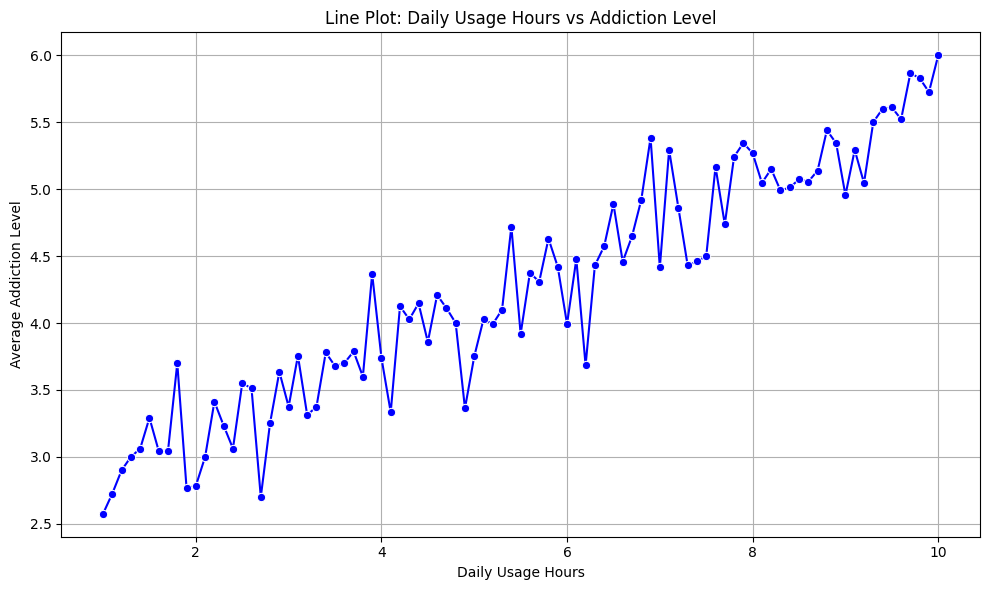

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Grouping by Daily_Usage_Hours to get average Addiction_Level per usage hour
grouped_df = df.groupby('Daily_Usage_Hours')['Addiction_Level'].mean().reset_index()

# Handle infinite values to avoid FutureWarnings
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Daily_Usage_Hours', y='Addiction_Level', marker='o', color='blue')
plt.title('Line Plot: Daily Usage Hours vs Addiction Level')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


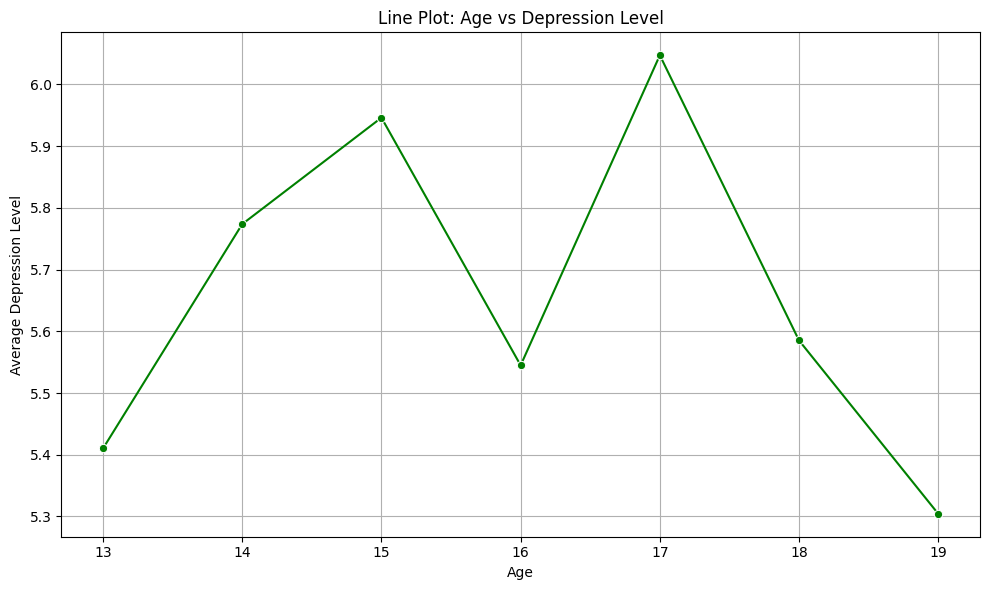

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by Age to get average Depression_Level per age
grouped_df = df.groupby('Age')['Depression_Level'].mean().reset_index()

# Handle infinite values to avoid FutureWarnings
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Age', y='Depression_Level', marker='o', color='green')
plt.title('Line Plot: Age vs Depression Level')
plt.xlabel('Age')
plt.ylabel('Average Depression Level')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


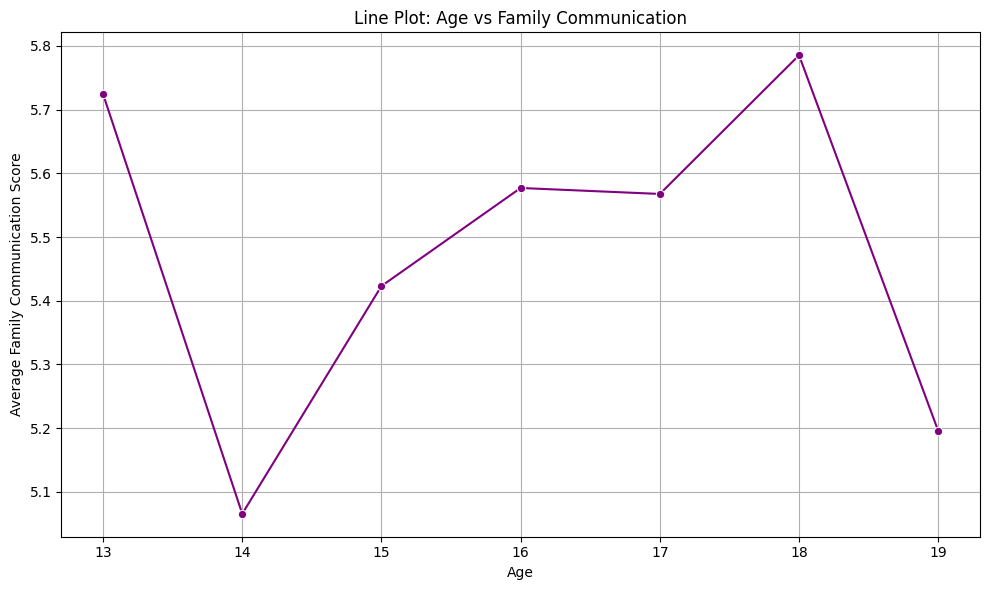

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by Age to get average Family_Communication per age
grouped_df = df.groupby('Age')['Family_Communication'].mean().reset_index()

# Handle infinite values to avoid FutureWarnings
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Age', y='Family_Communication', marker='o', color='purple')
plt.title('Line Plot: Age vs Family Communication')
plt.xlabel('Age')
plt.ylabel('Average Family Communication Score')
plt.grid(True)
plt.tight_layout()
plt.show()

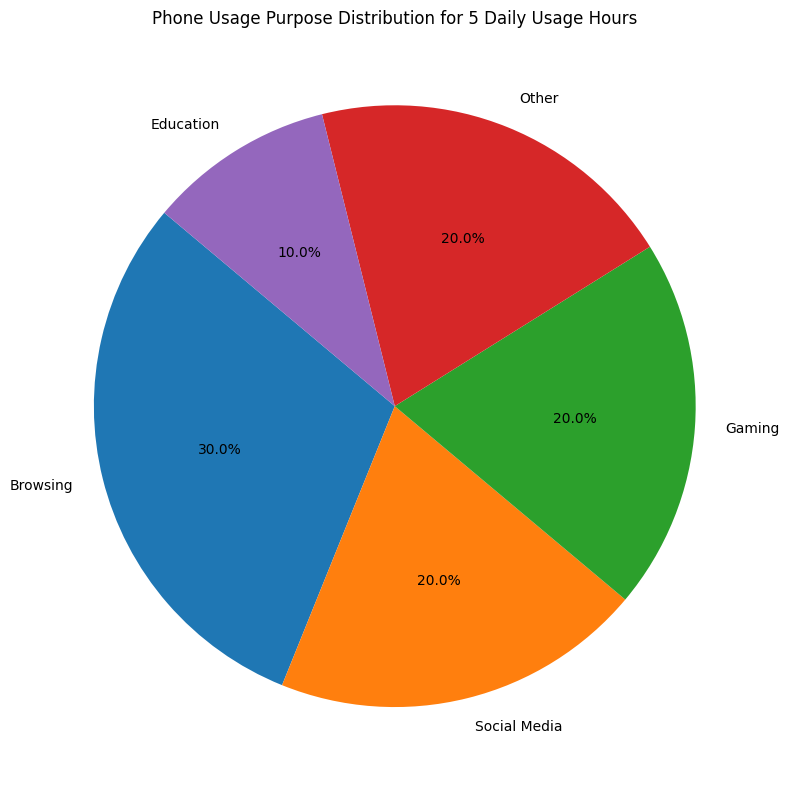

In [15]:

import pandas as pd
import matplotlib.pyplot as plt

# Filter for a specific Daily Usage Hour, e.g., 5 hours
usage_hour = 5
filtered_df = df[df['Daily_Usage_Hours'] == usage_hour]

# Check if filtered dataframe is empty
if filtered_df.empty:
    print(f"⚠️ Warning: No data found for exactly {usage_hour} hours of daily usage.")
    print(f"Available usage hours: {sorted(df['Daily_Usage_Hours'].unique())[:10]}...")
    print("Using closest match instead.")
    
    # Find the closest usage hour
    closest_hour = min(df['Daily_Usage_Hours'].unique(), key=lambda x: abs(x - usage_hour))
    filtered_df = df[df['Daily_Usage_Hours'] == closest_hour]
    usage_hour = closest_hour
    print(f"Using {usage_hour} hours instead.")

# Count Phone Usage Purpose distribution
purpose_counts = filtered_df['Phone_Usage_Purpose'].value_counts()

if len(purpose_counts) == 0:
    print("❌ Error: No data available to create pie chart.")
else:
    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Phone Usage Purpose Distribution for {usage_hour} Daily Usage Hours')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


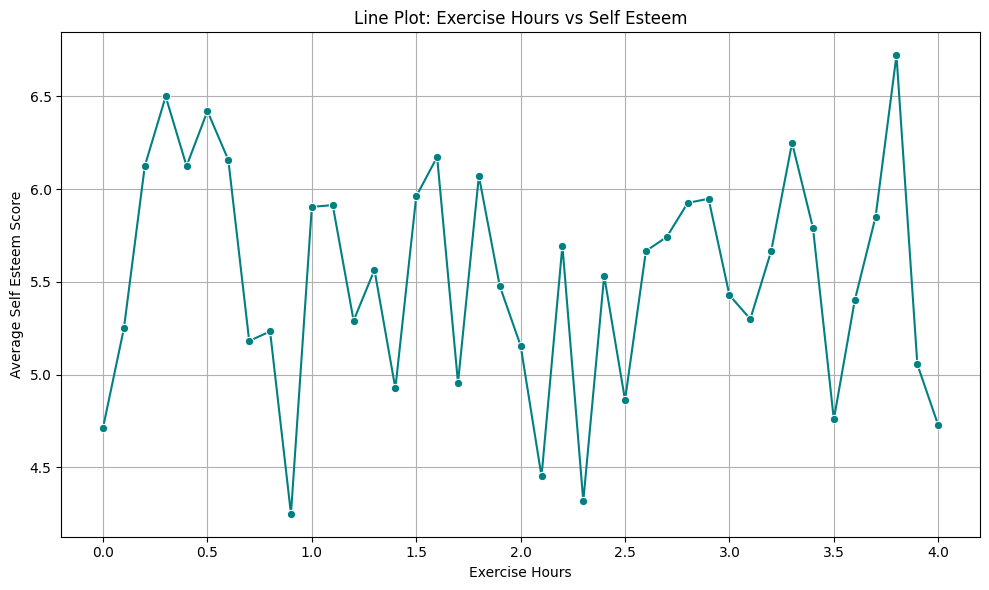

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by Exercise_Hours to get average Self_Esteem
grouped_df = df.groupby('Exercise_Hours')['Self_Esteem'].mean().reset_index()

# Handle infinite values to avoid FutureWarnings
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Exercise_Hours', y='Self_Esteem', marker='o', color='teal')
plt.title('Line Plot: Exercise Hours vs Self Esteem')
plt.xlabel('Exercise Hours')
plt.ylabel('Average Self Esteem Score')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


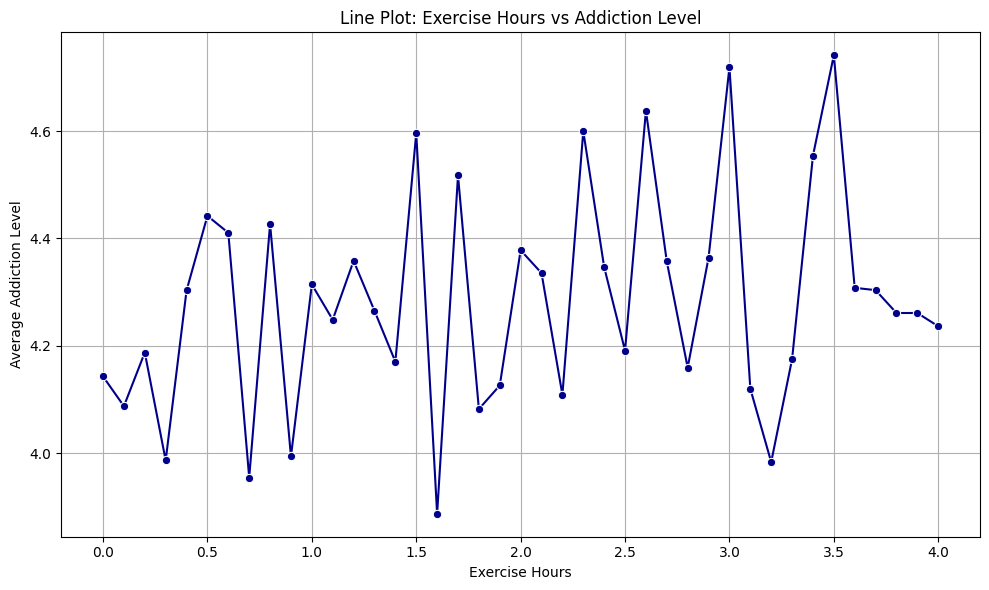

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by Exercise_Hours to get average Addiction_Level
grouped_df = df.groupby('Exercise_Hours')['Addiction_Level'].mean().reset_index()

# Handle infinite values to avoid FutureWarnings
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Exercise_Hours', y='Addiction_Level', marker='o', color='darkblue')
plt.title('Line Plot: Exercise Hours vs Addiction Level')
plt.xlabel('Exercise Hours')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

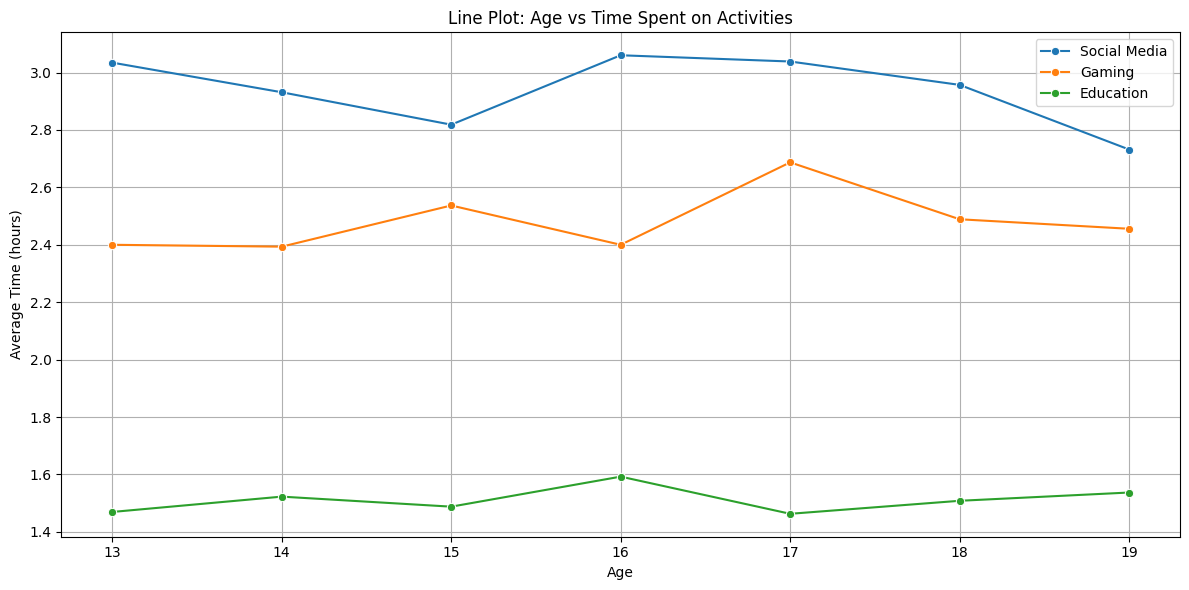

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by Age and calculate average time spent on each activity
grouped_df = df.groupby('Age')[['Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']].mean().reset_index()

# Handle infinite values to avoid FutureWarnings
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna()

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Social_Media', marker='o', label='Social Media')
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Gaming', marker='o', label='Gaming')
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Education', marker='o', label='Education')

plt.title('Line Plot: Age vs Time Spent on Activities')
plt.xlabel('Age')
plt.ylabel('Average Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


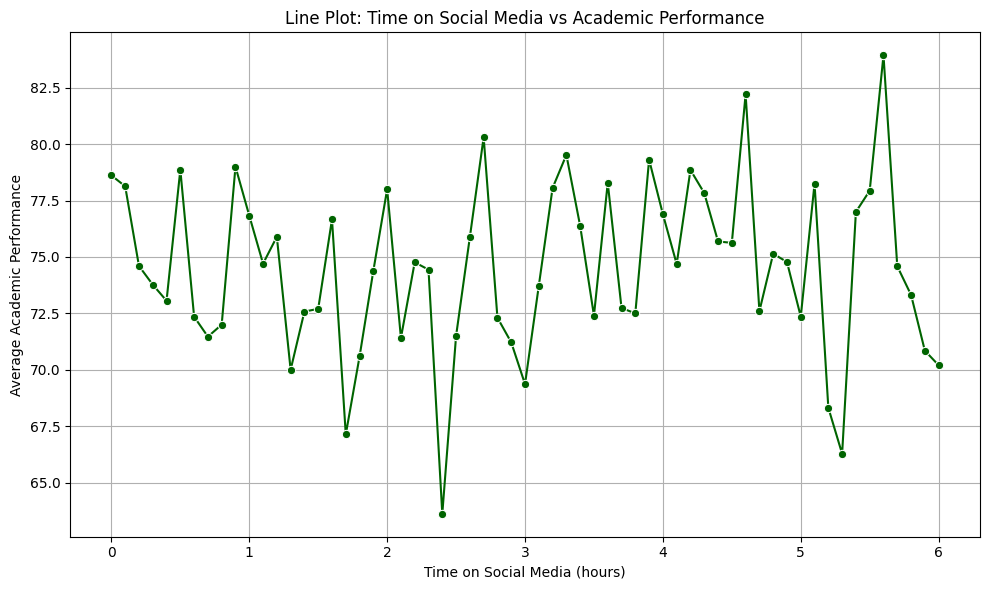

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by Time_on_Social_Media to get average Academic_Performance
grouped_df = df.groupby('Time_on_Social_Media')['Academic_Performance'].mean().reset_index()

# Handle infinite values to avoid FutureWarnings
grouped_df = grouped_df.replace([np.inf, -np.inf], np.nan).dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Time_on_Social_Media', y='Academic_Performance', marker='o', color='darkgreen')
plt.title('Line Plot: Time on Social Media vs Academic Performance')
plt.xlabel('Time on Social Media (hours)')
plt.ylabel('Average Academic Performance')
plt.grid(True)
plt.tight_layout()
plt.show()


Boxplots saved to all_numeric_boxplots.png


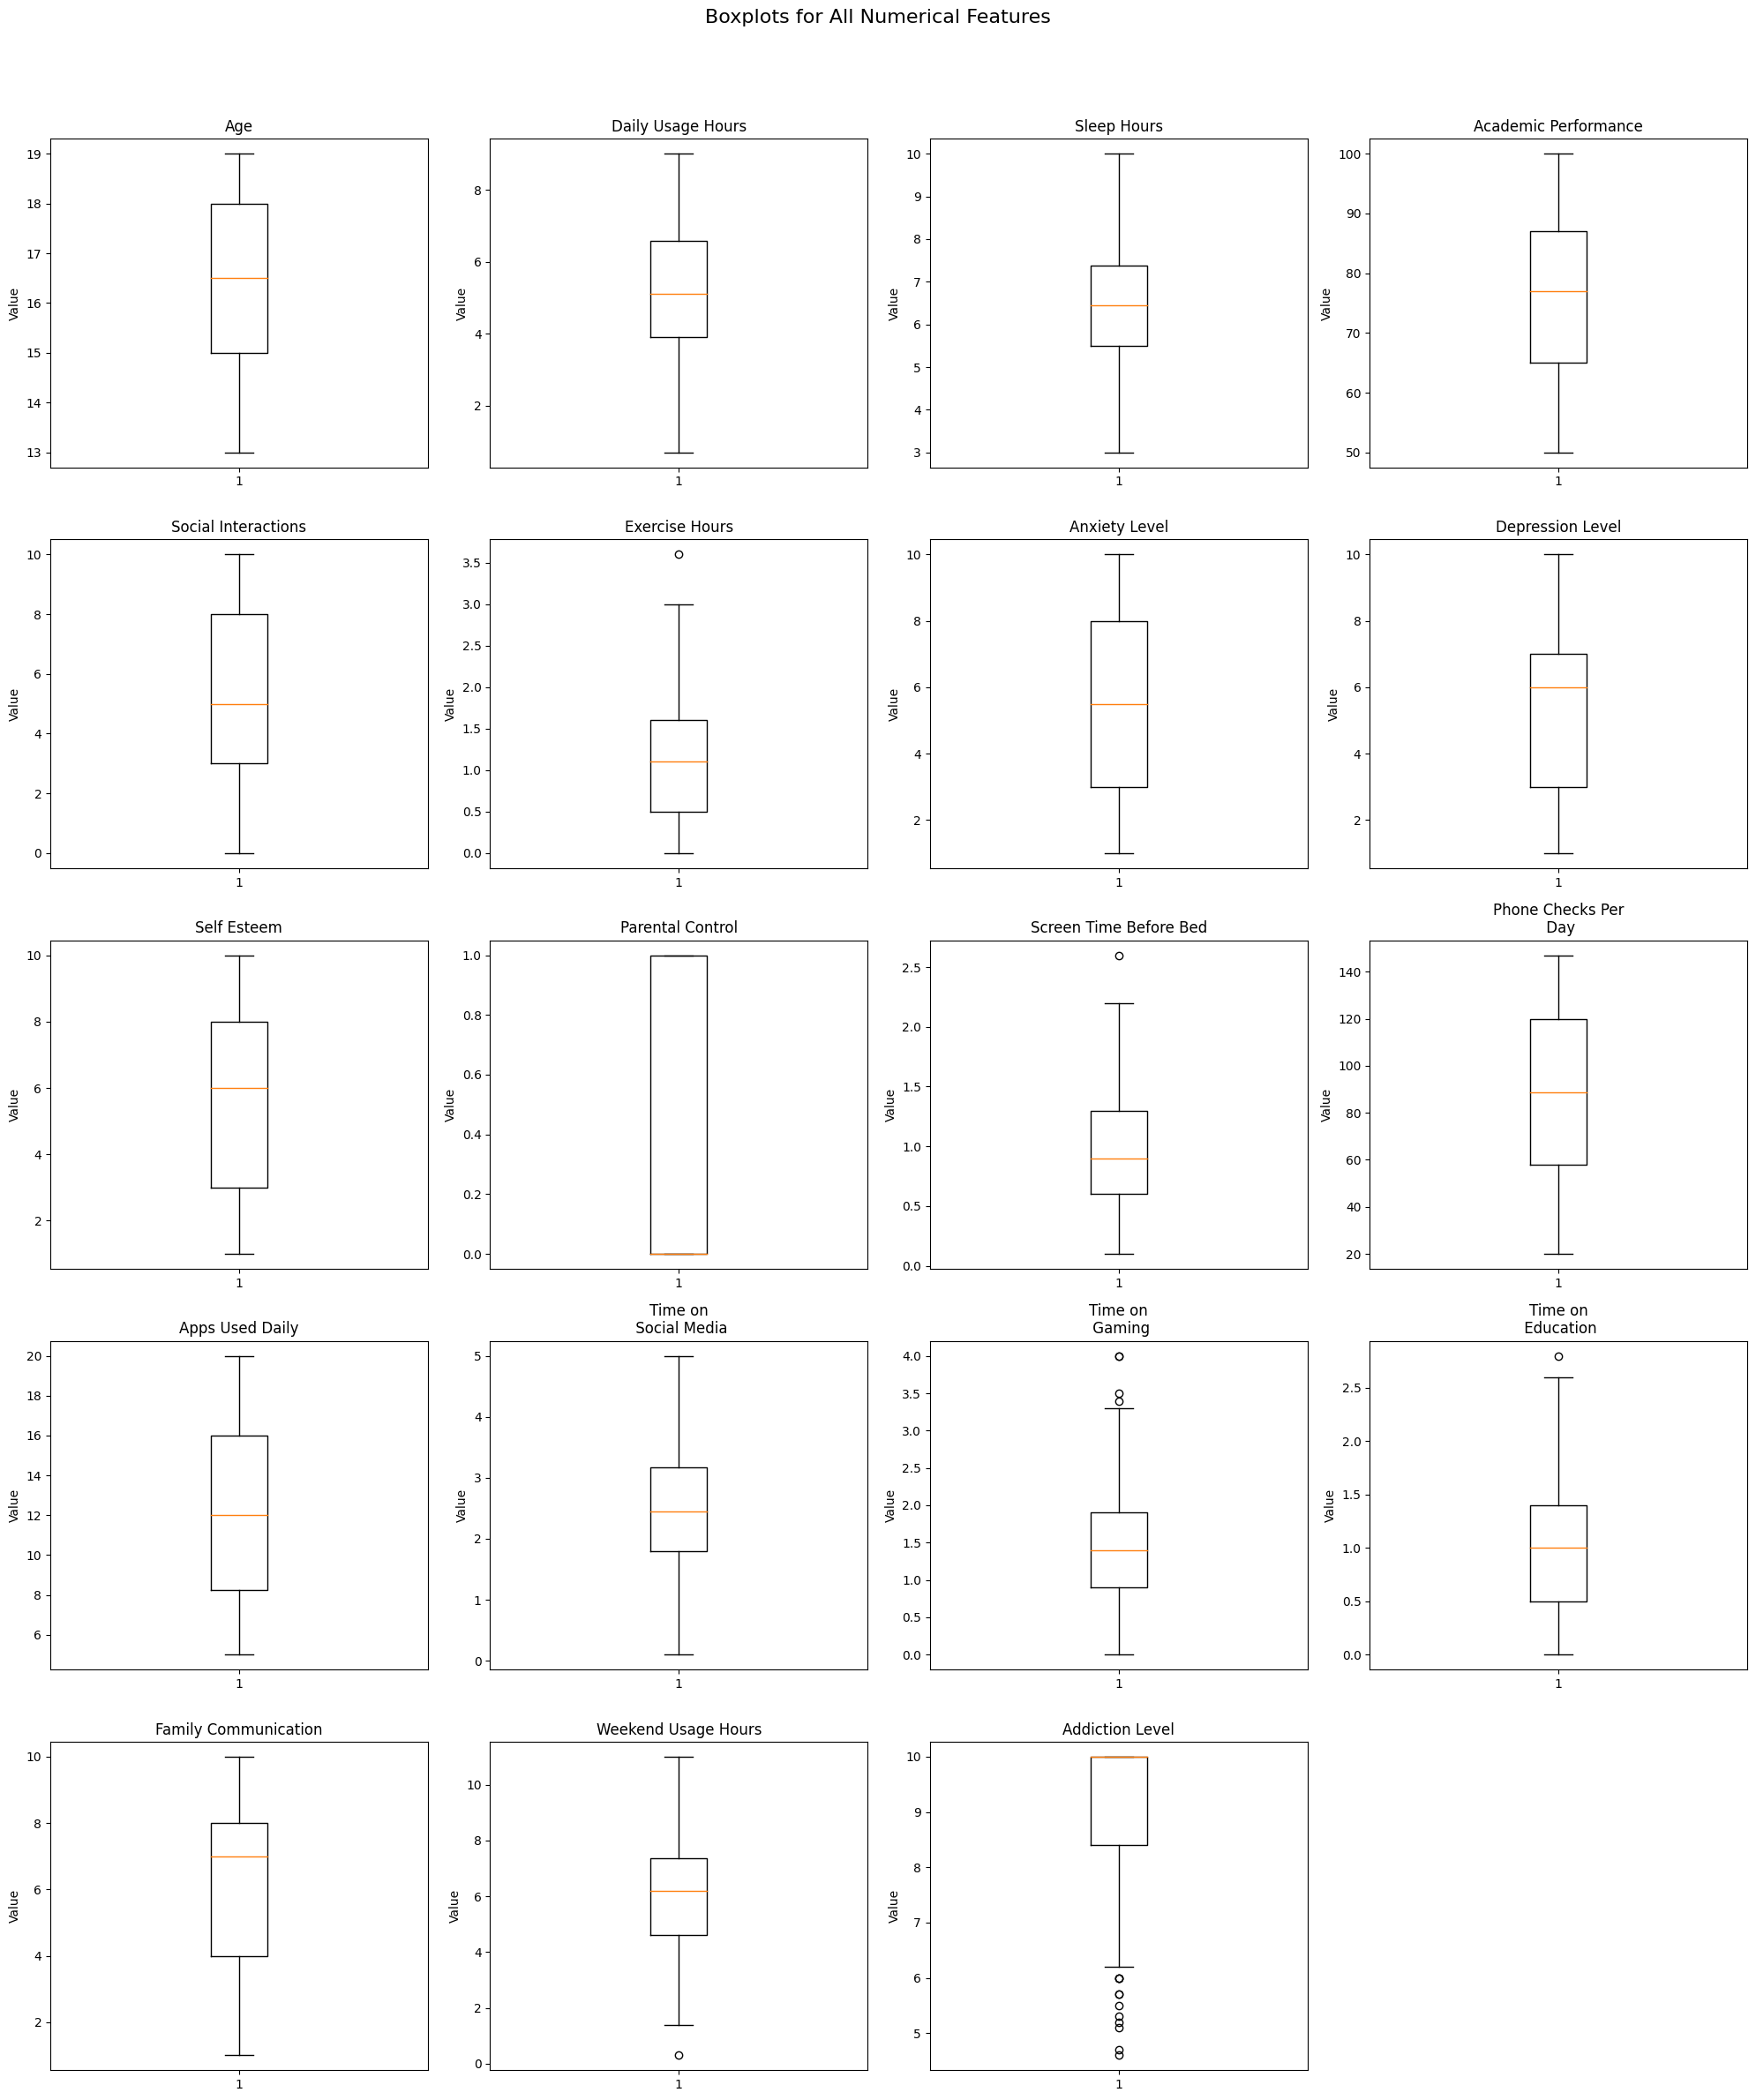

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io

def generate_boxplots_all_numeric(file_content):
    """
    Loads data from a string, generates and saves boxplots for all numerical features,
    excluding specified columns.

    Args:
        file_content (str): The content of the CSV file as a string.
    """
    try:
        # Load the dataset from the string content
        df = pd.read_csv(io.StringIO(file_content))

        # Define columns to exclude from plotting
        exclude_cols = ['ID', 'Name', 'Location']
        
        # Identify all numeric columns to plot
        numeric_cols = [
            col for col in df.select_dtypes(include=['int64', 'float64']).columns
            if col not in exclude_cols
        ]
        
        # Determine the number of subplots needed
        num_plots = len(numeric_cols)
        num_rows = (num_plots + 3) // 4  # Calculate number of rows, 4 plots per row
        num_cols = 4

        # Set up the plotting environment
        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
        axes = axes.flatten()

        # Generate a boxplot for each numerical column
        for i, col in enumerate(numeric_cols):
            axes[i].boxplot(df[col].dropna())
            axes[i].set_title(col.replace('_', ' ').replace('Time on', 'Time on\n').replace('Checks Per', 'Checks Per\n'))
            axes[i].set_ylabel('Value')

        # Hide any unused subplots
        for j in range(num_plots, len(axes)):
            fig.delaxes(axes[j])

        plt.suptitle('Boxplots for All Numerical Features', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # Save the figure to a file
        plot_file = 'all_numeric_boxplots.png'
        plt.savefig(plot_file)
        print(f"Boxplots saved to {plot_file}")

    except Exception as e:
        print(f"An error occurred: {e}")

# The file content fetched in the previous step is available as a string.
file_content = """ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,0.1,10,3,8,0,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,0.0,3,7,3,0,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,0.8,2,3,10,0,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,1.6,9,10,3,0,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,1.1,1,5,1,0,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,0.7,7,1,3,0,1.1,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8
7,Hailey Moses,16,Male,North Jeffrey,11th,6.3,6.7,89,3,0.9,6,7,9,0,0.8,129,9,1.8,2.7,1.0,Education,7,7.8,10.0
8,Veronica Marshall,13,Other,Jenniferport,10th,5.1,6.1,70,2,2.2,5,6,8,0,1.0,34,7,2.3,1.6,0.5,Browsing,9,8.0,8.0
9,Edward Avila,13,Male,Leebury,8th,3.0,9.1,79,0,1.8,1,7,6,0,0.9,70,13,2.7,2.2,1.3,Education,10,9.1,7.3
10,James Carter,18,Other,Prestonview,11th,3.9,5.8,89,8,1.1,9,1,9,0,0.9,121,13,2.7,0.4,1.0,Other,9,2.9,9.1
11,Bobby Sparks,18,Female,Cherylburgh,12th,4.9,7.0,74,5,0.6,4,3,2,0,0.6,84,20,3.1,0.6,0.8,Other,6,3.5,10.0
12,Ruben Walters,14,Male,Lake Mary,11th,1.6,5.9,70,10,1.5,10,8,8,0,0.9,147,18,1.9,2.7,1.0,Browsing,7,3.2,9.8
13,Sarah Nguyen,19,Female,South Heatherton,10th,7.4,5.8,70,4,0.6,4,9,3,0,1.1,59,19,4.3,0.4,0.4,Gaming,8,9.1,10.0
14,Melanie Phillips,17,Female,Port Angelaburgh,9th,8.7,5.5,95,6,1.9,2,8,2,1,0.7,76,8,4.2,1.3,1.5,Education,5,4.6,10.0
15,Edwin Lambert,15,Other,New Emilyberg,12th,6.4,8.5,79,3,0.0,2,8,9,1,0.5,50,14,5.0,1.2,0.0,Social Media,5,5.6,10.0
16,Gregory Hughes,19,Other,Port Charles,11th,4.4,6.6,97,6,1.6,8,10,4,1,1.2,134,17,2.2,1.5,1.8,Education,4,6.8,10.0
17,Matthew Webb,15,Female,Lake Chase,8th,5.4,7.8,87,4,2.3,6,6,9,0,0.9,36,20,2.6,1.3,1.1,Gaming,9,1.4,10.0
18,John Cooper,15,Other,Paulstad,10th,3.0,6.1,80,5,1.4,1,4,2,1,1.2,95,16,3.0,1.9,0.2,Other,7,7.5,10.0
19,Amy Greene,19,Female,Port Nicholasberg,9th,7.9,8.5,96,6,0.1,5,2,4,1,1.0,58,9,2.2,1.9,1.3,Education,5,3.5,10.0
20,Kathryn Perez,18,Male,South Thomas,12th,5.4,5.9,69,4,1.3,2,7,8,0,0.6,83,19,1.6,1.0,0.4,Browsing,7,6.1,10.0
21,Michael Williams,15,Female,Margaretmouth,12th,3.0,5.1,83,4,1.1,1,9,4,1,1.5,58,6,1.7,1.7,2.0,Social Media,8,6.7,6.2
22,Patricia Johnson,16,Female,North Scott,12th,2.7,6.3,92,3,1.4,2,9,3,1,1.7,112,17,2.1,2.6,0.9,Gaming,10,5.7,9.9
23,Jennifer Davis,14,Other,Port Angelabury,11th,2.7,5.1,60,9,0.0,4,6,2,0,1.7,117,16,2.5,1.3,0.2,Education,5,4.8,9.5
24,Desiree Brady,19,Male,East Amanda,9th,6.9,3.6,79,5,1.0,5,5,10,1,0.8,32,7,2.0,1.3,1.2,Education,7,6.6,10.0
25,Mark Crawford,19,Other,Port Alan,12th,4.6,7.2,85,7,1.3,7,6,4,0,1.1,71,5,1.8,0.8,1.1,Social Media,8,6.2,6.0
26,Samantha Sanchez,16,Male,Port Bianca,11th,5.5,5.9,78,5,1.2,1,7,3,0,0.7,44,14,0.9,1.3,1.3,Gaming,3,3.9,8.4
27,Kelly Giles,19,Male,West Kimberlyfurt,11th,6.2,4.5,65,3,1.3,5,7,1,0,1.1,115,10,2.1,1.6,1.0,Social Media,7,6.6,10.0
28,Jeffrey Crawford,19,Male,Shawburgh,8th,4.9,9.3,50,4,0.0,7,4,1,0,0.3,117,5,3.5,4.0,0.9,Education,3,7.0,10.0
29,Tammy Gallegos,17,Female,West Cynthia,10th,6.6,8.1,77,7,1.0,6,1,3,1,1.5,147,14,2.0,1.7,1.6,Education,8,9.2,10.0
30,Jared Bridges,19,Other,Jessicaberg,11th,8.6,5.2,63,0,1.1,6,4,8,0,1.3,72,15,0.2,1.8,0.7,Browsing,9,6.6,10.0
31,Bailey Flores,15,Other,Lake Martha,12th,4.1,4.5,59,8,0.8,10,1,8,0,0.6,32,10,2.2,1.0,0.5,Education,9,9.3,7.7
32,Jennifer Hudson,19,Male,Vickifurt,10th,4.2,6.9,86,8,1.7,5,1,9,1,1.0,100,15,2.6,2.2,0.9,Browsing,4,6.9,10.0
33,Kathleen Friedman,19,Male,Port Ryan,10th,8.0,5.5,87,7,2.2,1,8,5,0,1.0,26,16,3.3,1.3,2.6,Gaming,6,5.2,10.0
34,Cynthia Fisher,16,Male,Lake Jamiebury,9th,3.3,5.3,50,4,0.0,7,1,6,0,0.3,141,14,0.7,3.2,0.0,Gaming,5,5.1,10.0
35,Amy Carroll,16,Male,South Williamfort,12th,4.7,6.6,59,6,1.5,10,4,7,1,0.6,123,18,1.0,1.1,1.2,Social Media,2,0.3,9.6
36,Monica Roberts,15,Male,West Kristinaview,8th,3.9,6.3,64,9,1.3,6,7,8,1,0.9,135,11,1.2,1.5,1.5,Social Media,7,2.2,8.4
37,Laura Steele,13,Female,Burketown,8th,4.4,6.8,62,8,1.4,2,1,10,0,1.7,66,7,0.9,0.0,0.0,Browsing,1,6.9,4.6
38,Lauren Matthews,13,Male,Christineton,9th,8.3,6.2,65,9,1.3,5,6,8,1,1.3,144,5,2.3,0.0,1.5,Other,1,2.9,10.0
39,Marcus Stephens,16,Other,Schmitthaven,9th,7.4,6.9,67,0,1.7,6,6,8,0,1.6,117,16,1.6,0.7,0.7,Social Media,8,4.6,10.0
40,Cameron Hansen,16,Female,North Christina,12th,1.7,6.8,68,9,0.8,5,9,1,1,0.7,107,18,2.4,0.6,0.0,Education,6,6.2,7.0
41,Richard Choi,13,Other,Jasonmouth,8th,6.2,8.3,77,1,0.4,7,2,4,0,1.1,141,5,3.8,1.4,0.9,Browsing,8,6.2,10.0
42,Nicholas Gomez,19,Other,Roberttown,12th,5.2,7.2,96,5,0.1,4,10,3,0,0.7,119,16,3.0,1.7,0.6,Gaming,3,6.1,10.0
43,Jessica Smith,15,Other,Andreville,11th,3.3,5.3,89,7,0.0,9,6,9,0,0.3,77,18,1.1,1.0,0.0,Gaming,9,10.4,7.9
44,Brittany Myers,13,Male,Nguyenfort,11th,6.9,6.2,89,4,1.1,3,2,7,1,0.3,140,13,3.0,1.9,0.7,Gaming,9,4.1,10.0
45,Alicia White,13,Male,Millerton,9th,6.6,5.0,88,8,2.1,10,7,10,0,2.0,56,20,2.1,1.4,0.4,Education,9,6.2,10.0
46,Brandi King,18,Female,Evanschester,8th,1.0,6.2,60,5,1.4,6,3,10,0,0.4,25,16,3.1,0.0,2.0,Gaming,4,5.8,4.7
47,Kenneth Travis,17,Male,Castilloside,8th,6.7,4.7,67,3,1.3,10,1,3,0,0.8,129,6,2.8,0.8,1.7,Gaming,7,9.9,10.0
48,James Sanchez,19,Other,Adamsside,11th,7.1,7.1,67,2,0.4,1,1,4,0,2.6,119,16,2.8,2.4,0.0,Gaming,4,5.3,10.0
49,Tyrone Cabrera,18,Male,New Ericview,7th,4.7,6.5,69,6,1.5,10,3,1,0,1.3,119,5,3.4,1.0,0.0,Gaming,10,4.7,9.2
50,Curtis Castro,14,Male,East Amber,11th,8.1,7.2,91,6,1.4,8,7,8,1,0.3,120,13,1.4,2.2,1.9,Education,9,6.0,10.0
51,Steven Chavez,14,Male,Yuport,9th,4.3,5.9,75,4,2.5,5,1,8,1,2.2,105,17,1.9,1.4,1.4,Other,1,3.1,10.0
52,Cody Young,17,Male,Savagetown,11th,3.9,8.4,97,3,0.5,1,7,8,0,1.2,66,13,4.3,1.6,1.0,Education,6,4.9,9.5
53,Victoria Clark,13,Other,Collinston,9th,9.0,7.3,79,6,1.1,1,1,7,1,0.8,127,17,3.1,1.5,0.0,Education,1,6.9,10.0
54,Peggy Bond,15,Other,East Laurieview,8th,4.5,7.8,93,5,1.0,7,7,2,1,1.3,83,17,2.6,1.2,2.4,Education,8,6.0,9.5
55,Candace Anderson,14,Other,Kimberlyburgh,11th,4.4,4.1,56,9,1.7,7,7,1,1,0.8,129,16,4.9,1.4,0.6,Other,10,6.1,10.0
56,Tammy Payne,19,Other,South Thomas,12th,5.9,8.5,87,2,0.0,4,10,9,0,1.5,48,6,3.0,1.5,0.7,Social Media,2,6.5,8.3
57,Mrs. Lauren Ayala,17,Other,Port Dustin,10th,3.3,6.1,78,2,3.6,2,9,9,1,1.2,141,17,1.9,1.0,0.2,Education,8,5.1,9.4
58,Edward Jackson,15,Female,Davidberg,12th,2.9,5.5,71,1,1.1,9,2,1,1,0.9,117,10,2.0,1.6,1.3,Gaming,7,4.6,8.1
59,Kathleen Hoffman,17,Male,Walkerburgh,11th,3.4,4.7,79,10,0.9,8,4,5,0,0.6,123,6,3.0,1.7,0.7,Other,5,7.6,9.4
60,Kelly Carrillo,17,Female,West Tracey,7th,6.3,7.4,77,8,1.6,4,4,10,0,1.4,110,8,3.7,1.5,1.9,Gaming,1,3.1,10.0
61,Derek York,19,Male,Shafferville,10th,3.7,7.9,89,9,0.7,8,7,7,0,0.3,92,7,0.9,2.1,0.9,Education,7,2.0,6.0
62,Ashley Velasquez,18,Male,Johnsonstad,7th,4.7,6.9,77,7,0.9,6,10,1,0,1.0,105,12,0.7,1.3,0.0,Education,8,8.3,7.8
63,Sara Williams,17,Other,Traceymouth,8th,6.7,7.9,54,8,1.3,7,10,7,0,0.2,84,9,2.2,1.3,1.4,Education,9,7.9,9.7
64,Linda Fletcher,18,Female,Lake Samanthabury,12th,5.3,7.7,63,1,2.2,10,6,4,1,0.7,135,6,1.7,2.4,1.6,Other,9,5.7,9.4
65,Jaclyn Salazar,17,Male,Alejandraburgh,12th,8.7,5.2,87,5,0.0,4,8,2,1,1.2,146,10,4.0,0.6,0.4,Gaming,6,5.9,10.0
66,Stephanie Fletcher,17,Other,Port Jonathanside,9th,3.9,8.0,80,3,1.5,4,5,10,0,0.3,41,11,2.6,0.0,1.1,Social Media,2,5.7,5.5
67,Zachary Parks,16,Female,Bradyton,10th,7.4,6.6,100,3,1.1,2,3,5,1,1.3,90,19,2.1,0.8,0.6,Other,9,9.3,10.0
68,Chelsey Dillon,18,Female,Franciston,11th,6.8,10.0,98,7,1.7,7,8,3,1,1.7,72,16,2.4,1.0,2.0,Social Media,10,7.6,9.8
69,Elijah Lewis,18,Female,Candacemouth,8th,7.0,8.0,70,5,1.9,8,5,7,1,0.7,133,9,1.6,0.6,0.4,Gaming,5,1.8,9.7
70,Joseph Franklin,16,Male,West Lisaview,8th,5.8,7.2,88,5,1.0,9,9,2,0,0.7,30,15,2.6,0.7,0.5,Browsing,10,9.7,9.1
71,Christine Hansen,17,Other,Jamesbury,12th,4.1,5.5,67,2,0.2,1,7,4,1,0.5,120,16,4.3,2.1,2.0,Browsing,8,11.0,10.0
72,Kristen Holmes,19,Other,Hickschester,12th,4.9,4.4,86,5,1.8,7,6,7,1,0.9,90,15,2.5,1.2,0.5,Other,2,4.2,10.0
73,Michelle Ellis,18,Male,West Erikashire,12th,4.4,6.6,95,3,1.1,8,1,3,1,0.6,91,15,2.2,1.6,0.8,Education,1,3.9,9.7
74,Dr. David Howard,19,Male,South Taylortown,8th,6.3,3.0,58,8,1.1,5,2,8,0,0.6,48,6,3.9,1.1,0.1,Other,6,8.5,10.0
75,Michael Tucker,15,Male,New Gregstad,9th,5.8,6.9,84,8,2.3,3,9,3,1,0.5,106,7,3.1,1.2,1.5,Social Media,6,5.5,10.0
76,Brenda Lee,13,Female,Morganshire,8th,6.5,7.2,58,10,0.3,9,6,5,0,1.1,74,6,2.6,2.0,1.1,Gaming,9,8.7,10.0
77,Jennifer Levine,17,Female,West Michael,9th,5.8,7.0,76,8,1.7,5,5,5,1,1.7,116,19,3.0,2.2,2.2,Education,9,3.3,10.0
78,Joshua Moore,19,Other,Gonzalezland,7th,5.1,7.0,64,4,1.5,10,6,7,0,1.7,140,5,0.5,1.7,0.9,Gaming,2,7.7,7.6
79,Marcus Gibson,13,Other,East Thomas,8th,5.2,6.0,87,0,0.8,1,5,8,1,1.6,79,11,4.2,0.0,1.2,Gaming,6,3.7,10.0
80,Mackenzie Wright,13,Male,Antoniohaven,11th,4.8,8.6,78,8,0.0,3,3,10,1,1.0,51,9,3.0,2.4,1.6,Social Media,7,7.1,8.7
81,Christopher Smith,19,Male,Lake Susanport,11th,4.3,4.3,91,6,0.0,9,8,5,0,0.9,98,7,2.2,0.6,0.3,Social Media,8,5.2,8.3
82,Andrew Kim,19,Female,North Cristina,7th,7.6,6.4,88,4,0.0,6,4,8,0,1.8,77,15,4.6,0.0,0.0,Gaming,7,7.1,10.0
83,Rebecca Reynolds,17,Female,Lake Adrianberg,7th,5.5,6.9,65,3,0.4,6,9,9,1,0.4,82,6,1.6,1.1,0.2,Browsing,4,6.2,7.6
84,Catherine Bradshaw,15,Other,Sarahfurt,10th,4.8,6.3,76,8,1.6,2,6,7,1,1.1,136,11,4.8,1.3,1.2,Social Media,8,5.3,10.0
85,Tammy Carter,19,Other,Marktown,9th,7.4,6.3,75,6,1.5,9,7,2,1,0.3,85,9,2.9,2.9,0.0,Social Media,1,7.6,10.0
86,Maria Ochoa,16,Male,South Tonyton,12th,3.8,5.1,85,1,0.0,8,7,8,0,0.6,104,10,1.8,0.5,1.3,Social Media,9,9.3,7.6
87,James Herrera,13,Other,Lake Nancy,10th,7.3,5.6,84,1,0.2,4,1,8,0,1.2,22,11,2.2,2.0,0.9,Other,1,4.1,10.0
88,Brian Coleman,19,Female,Kevinport,8th,0.7,4.6,64,6,1.3,10,1,9,0,0.4,146,10,2.2,0.2,1.3,Other,3,5.3,5.7
89,Gregory Martinez,14,Male,South Adamside,11th,3.0,6.6,82,0,0.8,1,3,3,0,0.6,84,6,3.7,2.3,1.0,Other,9,6.7,8.6
90,Richard Nichols,19,Other,East Andrewport,12th,4.0,7.4,83,3,0.3,10,4,4,0,0.6,55,18,4.1,0.8,0.0,Gaming,3,7.4,9.9
91,Steven Tanner,16,Other,Craigstad,12th,8.1,6.8,59,1,0.0,7,3,1,0,0.6,129,7,0.7,2.5,1.5,Other,1,5.1,10.0
92,Michael Farmer,17,Male,Guerrafort,12th,5.2,6.6,56,10,0.9,6,8,4,0,0.5,98,16,2.4,1.4,1.0,Other,5,8.1,10.0
93,Keith Ward,18,Other,Parsonsfurt,7th,1.7,6.2,52,8,1.3,2,2,7,0,1.3,76,17,1.1,1.9,0.7,Social Media,7,6.5,6.5
94,Aaron Parker,15,Male,Port Maryborough,8th,6.8,7.4,100,9,1.1,6,7,7,0,1.9,123,11,4.2,1.6,0.7,Social Media,5,6.8,10.0
95,Wesley Miller,18,Female,Sherryton,9th,6.4,10.0,89,0,1.2,9,9,8,0,0.5,128,9,4.1,3.2,1.4,Education,2,4.6,10.0
96,Tiffany Santiago,17,Male,Wilsonton,9th,7.2,7.4,63,7,0.1,2,3,8,0,0.7,112,11,3.8,0.5,0.5,Social Media,4,2.3,10.0
97,Lindsey Sloan,18,Female,Lake Adamfort,10th,3.3,5.7,93,5,1.7,9,6,7,1,0.1,72,17,3.6,1.2,0.3,Other,10,6.6,10.0
98,Kristin Martin,16,Male,East Patrickburgh,8th,4.7,8.5,98,3,0.2,4,5,8,0,0.1,20,16,2.8,1.3,0.3,Social Media,8,6.2,8.2
99,Valerie Blevins,18,Female,East Lynn,9th,2.8,7.0,93,5,0.8,4,5,2,0,1.5,42,6,2.8,1.0,0.6,Social Media,10,8.2,5.1
100,Morgan Mills,16,Female,East Derrick,8th,6.2,8.7,53,1,0.1,7,6,10,1,0.5,24,12,1.6,2.5,1.0,Other,7,6.7,8.8
101,Christian Perkins,17,Male,East Wendymouth,9th,6.7,8.5,91,4,1.4,8,7,2,0,0.2,49,9,2.1,3.5,1.5,Browsing,8,5.7,10.0
102,John Evans,14,Other,Port Pamelatown,8th,2.2,5.1,69,7,1.0,6,3,8,1,1.3,24,16,2.6,2.2,1.1,Other,9,7.6,8.1
103,Ashley Chang,13,Female,Harrisbury,11th,4.1,6.3,57,3,2.0,5,3,7,0,0.4,78,13,1.7,2.2,0.3,Gaming,3,5.8,9.0
104,Julia Ross,13,Male,Taraland,11th,5.3,5.9,85,9,0.6,6,1,2,1,0.9,98,14,2.3,2.6,0.9,Education,8,8.9,10.0
105,Ashley Foster,18,Female,South Shelleyfort,8th,4.7,3.4,71,1,1.8,7,4,7,1,1.5,87,9,0.1,0.0,0.0,Education,7,6.7,6.6
106,Katherine Hensley,19,Other,East Angelaland,10th,4.5,7.4,67,9,1.1,10,1,2,1,0.8,68,11,2.6,1.0,0.9,Gaming,4,7.4,8.0
107,Christopher Watts,13,Male,South Josephstad,7th,5.6,5.8,85,4,0.6,1,2,8,1,1.4,44,7,2.1,0.0,1.5,Gaming,7,6.6,7.1
108,Benjamin Bradley,15,Other,Rhondafurt,7th,7.3,5.0,67,2,0.5,8,5,5,0,1.4,77,18,1.2,1.1,0.8,Gaming,4,8.0,10.0
109,Rebecca Edwards,18,Female,Jaredmouth,11th,4.6,9.4,55,2,0.8,2,4,5,1,1.1,113,7,1.6,1.7,1.6,Education,4,8.6,6.9
110,Sarah Harrison,15,Other,North Cherylburgh,9th,2.0,5.9,74,5,0.9,2,9,6,0,1.1,47,12,2.0,1.3,1.4,Other,1,4.4,5.7
111,Kimberly Hooper,14,Male,Bentleytown,9th,1.6,6.1,70,7,0.0,9,5,1,0,1.6,42,5,4.8,0.8,1.5,Social Media,3,1.8,6.0
112,Melissa Becker DDS,18,Other,East Pamelaside,9th,2.0,7.5,76,0,1.1,1,7,2,1,0.9,115,7,1.4,1.9,1.3,Gaming,10,5.6,5.2
113,John Griffin,16,Male,Loveberg,10th,3.0,4.7,51,10,3.0,1,8,1,1,0.3,42,18,1.7,3.3,0.0,Education,3,6.7,10.0
114,James Alvarez,15,Female,Port Veronicamouth,9th,6.9,3.9,73,9,2.2,1,6,4,0,0.8,58,16,3.3,2.8,1.8,Education,3,4.9,10.0
115,Brad Sanchez,16,Other,Port Samanthaberg,8th,5.5,5.4,63,8,0.0,5,10,3,1,2.0,72,14,1.4,0.0,0.8,Other,1,8.3,8.4
116,Cory Santiago,15,Female,Robertshire,11th,6.6,9.5,53,5,1.0,8,4,1,0,0.8,121,13,4.5,1.7,2.8,Gaming,6,6.4,10.0
117,Shelley Curtis,19,Other,South Brittanychester,12th,8.3,5.7,58,9,1.6,3,1,3,0,0.1,21,9,1.7,0.8,1.2,Other,10,6.5,10.0
118,Cheryl Thomas,18,Other,East Chadhaven,8th,3.6,3.1,56,0,2.4,5,9,4,1,0.9,80,16,3.2,0.3,1.5,Social Media,7,7.3,10.0
119,Meagan Banks,17,Male,Glennshire,9th,5.4,3.1,88,0,0.0,7,10,10,0,0.7,29,11,2.9,0.3,0.5,Social Media,3,1.7,9.8
120,Dr. Elizabeth Porter,19,Other,Mirandaborough,9th,2.1,7.3,71,7,0.5,4,1,4,1,1.7,54,9,2.5,1.5,1.6,Education,5,2.1,5.3
121,Monica Shelton,16,Male,Brownchester,7th,7.8,7.4,81,0,1.9,5,6,10,0,1.1,135,14,3.6,1.1,1.3,Browsing,6,4.5,10.0
122,Heather Wilson,14,Male,Chelseafurt,9th,4.3,3.9,64,2,2.9,10,10,6,1,0.6,119,9,1.1,1.4,1.8,Other,4,6.7,9.0
123,Angie White,18,Other,West Maryport,12th,7.4,7.4,80,0,1.1,1,2,3,0,1.9,57,20,1.9,0.9,1.6,Gaming,10,4.6,10.0
124,Grace Mullen,18,Female,West Donna,7th,6.4,7.9,72,4,2.0,5,6,4,1,0.7,23,13,0.7,2.4,0.7,Other,3,7.4,8.6
125,Megan Colon,13,Other,West Jeremy,9th,2.0,8.4,78,10,1.9,10,10,8,0,1.1,131,10,2.1,1.8,0.7,Social Media,8,3.9,10.0
2988,Miss Emily Jenkins DDS,13,Other,South Theresa,12th,6.0,7.0,55,7,0.2,3,6,7,0,1.1,134,14,2.1,1.1,2.0,Other,7,5.0,10.0
2989,Angela Lyons,14,Male,Howebury,7th,6.4,5.1,50,8,0.5,2,4,9,0,1.0,82,15,3.3,0.2,0.8,Education,10,7.5,10.0
2990,Christine Davenport,18,Other,East Jeffreyburgh,10th,5.1,7.1,93,9,2.3,2,2,8,0,0.4,25,6,3.8,1.4,1.1,Browsing,6,6.8,8.4
2991,Lauren Ballard,13,Female,East John,10th,2.8,5.6,92,4,1.1,7,10,7,1,1.1,77,10,3.7,3.4,0.7,Social Media,5,7.1,10.0
2992,Christina Davila,16,Male,Heatherfurt,11th,6.3,5.7,87,8,2.9,6,1,8,0,0.8,70,14,3.5,0.8,1.4,Social Media,6,6.3,10.0
"""
generate_boxplots_all_numeric(file_content)

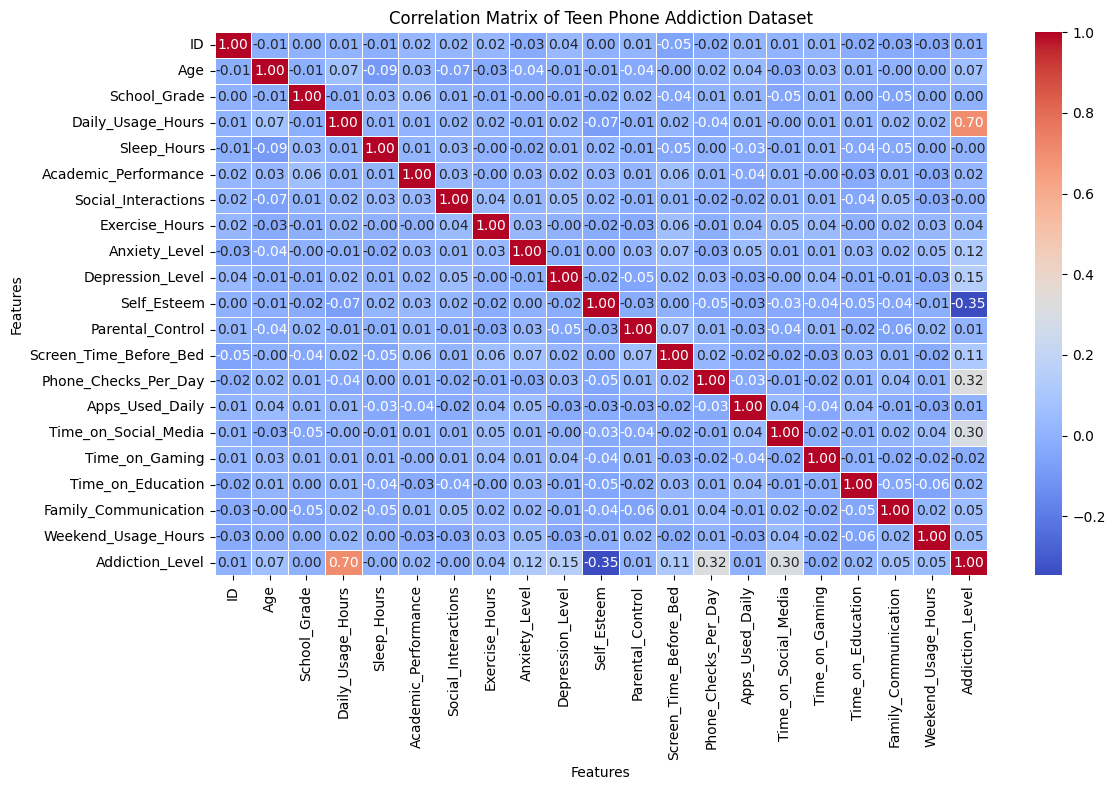

In [ ]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
# =============================================================================
# 📊 MACHINE LEARNING PIPELINE: PHONE ADDICTION PREDICTION
# =============================================================================

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data processing and ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                           mean_absolute_error, mean_squared_error, r2_score,
                           precision_recall_fscore_support, roc_auc_score, roc_curve)

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Classification Models  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Neural Networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

print("✅ All libraries imported successfully!")
print("🚀 Starting ML Pipeline for Phone Addiction Prediction...")

2025-10-31 07:02:10.071936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761894130.092540     174 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761894130.098650     174 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ All libraries imported successfully!
🚀 Starting ML Pipeline for Phone Addiction Prediction...


In [ ]:
# =============================================================================
# 📋 DATA PREPARATION MODULE
# =============================================================================

def prepare_data_for_ml():
    """
    Prepare data for both regression and classification approaches
    Returns: X, y_regression, y_classification, feature_names, label_encoders
    """
    print("🔄 Loading and preparing data...")
    
    # Use the already loaded dataset
    print(f"📊 Original dataset shape: {df.shape}")
    
    # Handle missing values
    df_clean = df.dropna()
    print(f"📊 After removing missing values: {df_clean.shape}")
    
    # Store original addiction level for regression
    y_regression = df_clean['Addiction_Level'].copy()
    
    # Create classification target (binning continuous values)
    df_clean['Addiction_Level_Category'] = pd.cut(df_clean['Addiction_Level'],
        bins=[-np.inf, 3.5, 7.5, np.inf],
        labels=['Low', 'Medium', 'High']
    )
    
    # Drop original addiction level and rename categorical version
    df_clean.drop(columns=['Addiction_Level'], inplace=True)
    df_clean.rename(columns={'Addiction_Level_Category': 'Addiction_Level'}, inplace=True)
    
    # Check class distribution
    print("\n📈 Classification target distribution:")
    print(df_clean['Addiction_Level'].value_counts())
    
    # Encode categorical variables
    label_encoders = {}
    categorical_cols = df_clean.select_dtypes(include='object').columns.tolist()
    
    for col in categorical_cols:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col])
        label_encoders[col] = le
        print(f"✅ Encoded {col}: {len(le.classes_)} unique values")
    
    # Prepare features and targets
    X = df_clean.drop('Addiction_Level', axis=1)
    y_classification = df_clean['Addiction_Level'].astype('category').cat.codes  # Convert to numeric codes
    
    # Store feature names
    feature_names = X.columns.tolist()
    
    print(f"\n✅ Data preparation complete!")
    print(f"📊 Features shape: {X.shape}")
    print(f"📊 Regression target shape: {y_regression.shape}")
    print(f"📊 Classification target shape: {y_classification.shape}")
    print(f"📊 Number of features: {len(feature_names)}")
    
    return X, y_regression, y_classification, feature_names, label_encoders

# Execute data preparation
X, y_regression, y_classification, feature_names, label_encoders = prepare_data_for_ml()


🔄 Loading and preparing data...
📊 Original dataset shape: (1000, 25)
📊 After removing missing values: (1000, 25)

📈 Classification target distribution:
Addiction_Level
Medium    732
Low       267
High        1
Name: count, dtype: int64
✅ Encoded Name: 1000 unique values
✅ Encoded Gender: 3 unique values
✅ Encoded Location: 10 unique values
✅ Encoded Phone_Usage_Purpose: 5 unique values

✅ Data preparation complete!
📊 Features shape: (1000, 24)
📊 Regression target shape: (1000,)
📊 Classification target shape: (1000,)
📊 Number of features: 24


In [ ]:
# =============================================================================
# 🔄 TRAIN-TEST SPLIT & FEATURE SCALING
# =============================================================================

def prepare_train_test_data(X, y_regression, y_classification, test_size=0.2, random_state=42):
    """
    Split data into train/test sets and apply feature scaling
    """
    print("🔄 Splitting data into train/test sets...")
    
    # Split for regression
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X, y_regression, test_size=test_size, random_state=random_state
    )
    
    # Split for classification (with stratification)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
        X, y_classification, test_size=test_size, random_state=random_state, stratify=y_classification
    )
    
    # Feature scaling
    print("🔄 Applying feature scaling...")
    scaler_reg = StandardScaler()
    scaler_clf = StandardScaler()
    
    # Scale features for regression
    X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
    X_test_reg_scaled = scaler_reg.transform(X_test_reg)
    
    # Scale features for classification
    X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
    X_test_clf_scaled = scaler_clf.transform(X_test_clf)
    
    print(f"✅ Train/Test split complete!")
    print(f"📊 Regression - Train: {X_train_reg_scaled.shape}, Test: {X_test_reg_scaled.shape}")
    print(f"📊 Classification - Train: {X_train_clf_scaled.shape}, Test: {X_test_clf_scaled.shape}")
    
    return {
        'regression': {
            'X_train': X_train_reg_scaled, 'X_test': X_test_reg_scaled,
            'y_train': y_train_reg, 'y_test': y_test_reg,
            'scaler': scaler_reg
        },
        'classification': {
            'X_train': X_train_clf_scaled, 'X_test': X_test_clf_scaled,
            'y_train': y_train_clf, 'y_test': y_test_clf,
            'scaler': scaler_clf
        }
    }

# Execute train-test split and scaling
data_splits = prepare_train_test_data(X, y_regression, y_classification)


🔄 Splitting data into train/test sets...


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# =============================================================================
# 📈 REGRESSION APPROACH: PREDICTING CONTINUOUS ADDICTION LEVELS
# =============================================================================

def train_regression_models(data_splits):
    """
    Train and evaluate multiple regression models
    """
    print("🚀 Training Regression Models...")
    print("=" * 60)
    
    # Define regression models
    regression_models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
        'XGBoost Regressor': XGBRegressor(random_state=42, eval_metric='rmse'),
        'Support Vector Regressor': SVR(kernel='rbf', C=1.0, gamma='scale')
    }
    
    # Get data splits
    X_train = data_splits['regression']['X_train']
    X_test = data_splits['regression']['X_test']
    y_train = data_splits['regression']['y_train']
    y_test = data_splits['regression']['y_test']
    
    # Store results
    regression_results = {}
    
    for name, model in regression_models.items():
        print(f"\n🔍 Training {name}...")
        
        try:
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            # Calculate metrics
            train_mae = mean_absolute_error(y_train, y_pred_train)
            test_mae = mean_absolute_error(y_test, y_pred_test)
            train_mse = mean_squared_error(y_train, y_pred_train)
            test_mse = mean_squared_error(y_test, y_pred_test)
            train_rmse = np.sqrt(train_mse)
            test_rmse = np.sqrt(test_mse)
            train_r2 = r2_score(y_train, y_pred_train)
            test_r2 = r2_score(y_test, y_pred_test)
            
            # Store results
            regression_results[name] = {
                'model': model,
                'train_mae': train_mae,
                'test_mae': test_mae,
                'train_mse': train_mse,
                'test_mse': test_mse,
                'train_rmse': train_rmse,
                'test_rmse': test_rmse,
                'train_r2': train_r2,
                'test_r2': test_r2,
                'y_pred_test': y_pred_test
            }
            
            print(f"✅ {name} - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")
            
        except Exception as e:
            print(f"❌ Error training {name}: {str(e)}")
            continue
    
    return regression_results

# Train regression models
regression_results = train_regression_models(data_splits)


In [ ]:
# =============================================================================
# 📊 REGRESSION RESULTS VISUALIZATION
# =============================================================================

def visualize_regression_results(regression_results, data_splits):
    """
    Create comprehensive visualizations for regression results
    """
    print("📊 Creating regression results visualizations...")
    
    # Create results DataFrame
    results_data = []
    for name, results in regression_results.items():
        results_data.append({
            'Model': name,
            'Test R²': results['test_r2'],
            'Test RMSE': results['test_rmse'],
            'Test MAE': results['test_mae'],
            'Train R²': results['train_r2'],
            'Train RMSE': results['train_rmse']
        })
    
    results_df = pd.DataFrame(results_data).sort_values('Test R²', ascending=False)
    
    # 1. Model Performance Comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # R² Score comparison
    sns.barplot(data=results_df, x='Test R²', y='Model', ax=axes[0,0], palette='viridis')
    axes[0,0].set_title('Model Performance: R² Score', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('R² Score')
    axes[0,0].grid(True, alpha=0.3)
    
    # RMSE comparison
    sns.barplot(data=results_df, x='Test RMSE', y='Model', ax=axes[0,1], palette='plasma')
    axes[0,1].set_title('Model Performance: RMSE', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('RMSE')
    axes[0,1].grid(True, alpha=0.3)
    
    # MAE comparison
    sns.barplot(data=results_df, x='Test MAE', y='Model', ax=axes[1,0], palette='coolwarm')
    axes[1,0].set_title('Model Performance: MAE', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('MAE')
    axes[1,0].grid(True, alpha=0.3)
    
    # Train vs Test R² comparison
    x_pos = np.arange(len(results_df))
    width = 0.35
    axes[1,1].bar(x_pos - width/2, results_df['Train R²'], width, label='Train R²', alpha=0.8)
    axes[1,1].bar(x_pos + width/2, results_df['Test R²'], width, label='Test R²', alpha=0.8)
    axes[1,1].set_xlabel('Models')
    axes[1,1].set_ylabel('R² Score')
    axes[1,1].set_title('Train vs Test R² Comparison', fontsize=14, fontweight='bold')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Actual vs Predicted plots for top 3 models
    top_3_models = results_df.head(3)['Model'].tolist()
    y_test = data_splits['regression']['y_test']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, model_name in enumerate(top_3_models):
        y_pred = regression_results[model_name]['y_pred_test']
        
        axes[i].scatter(y_test, y_pred, alpha=0.6, s=20)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[i].set_xlabel('Actual Addiction Level')
        axes[i].set_ylabel('Predicted Addiction Level')
        axes[i].set_title(f'{model_name}\nR² = {regression_results[model_name]["test_r2"]:.4f}')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Print detailed results table
    print("\n📈 Detailed Regression Results:")
    print("=" * 80)
    print(results_df.round(4).to_string(index=False))
    
    return results_df

# Visualize regression results
regression_summary = visualize_regression_results(regression_results, data_splits)


In [ ]:
# =============================================================================
# 🎯 CLASSIFICATION APPROACH: PREDICTING ADDICTION CATEGORIES
# =============================================================================

def train_classification_models(data_splits):
    """
    Train and evaluate multiple classification models
    """
    print("🚀 Training Classification Models...")
    print("=" * 60)
    
    # Define classification models
    classification_models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
        'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
        'XGBoost Classifier': XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'Support Vector Classifier': SVC(probability=True, random_state=42),
        'Neural Network (MLP)': MLPClassifier(max_iter=500, random_state=42)
    }
    
    # Get data splits
    X_train = data_splits['classification']['X_train']
    X_test = data_splits['classification']['X_test']
    y_train = data_splits['classification']['y_train']
    y_test = data_splits['classification']['y_test']
    
    # Store results
    classification_results = {}
    
    for name, model in classification_models.items():
        print(f"\n🔍 Training {name}...")
        
        try:
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            # Calculate metrics
            train_acc = accuracy_score(y_train, y_pred_train)
            test_acc = accuracy_score(y_test, y_pred_test)
            
            # Get detailed classification report
            train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
                y_train, y_pred_train, average='weighted', zero_division=0
            )
            test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
                y_test, y_pred_test, average='weighted', zero_division=0
            )
            
            # Store results
            classification_results[name] = {
                'model': model,
                'train_accuracy': train_acc,
                'test_accuracy': test_acc,
                'train_precision': train_precision,
                'test_precision': test_precision,
                'train_recall': train_recall,
                'test_recall': test_recall,
                'train_f1': train_f1,
                'test_f1': test_f1,
                'y_pred_test': y_pred_test,
                'y_pred_proba': model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
            }
            
            print(f"✅ {name} - Test Accuracy: {test_acc:.4f}, Test F1: {test_f1:.4f}")
            
        except Exception as e:
            print(f"❌ Error training {name}: {str(e)}")
            continue
    
    return classification_results

# Train classification models
classification_results = train_classification_models(data_splits)


In [ ]:
# =============================================================================
# 📊 CLASSIFICATION RESULTS VISUALIZATION
# =============================================================================

def visualize_classification_results(classification_results, data_splits):
    """
    Create comprehensive visualizations for classification results
    """
    print("📊 Creating classification results visualizations...")
    
    # Create results DataFrame
    results_data = []
    for name, results in classification_results.items():
        results_data.append({
            'Model': name,
            'Test Accuracy': results['test_accuracy'],
            'Test Precision': results['test_precision'],
            'Test Recall': results['test_recall'],
            'Test F1-Score': results['test_f1'],
            'Train Accuracy': results['train_accuracy']
        })
    
    results_df = pd.DataFrame(results_data).sort_values('Test Accuracy', ascending=False)
    
    # 1. Model Performance Comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Accuracy comparison
    sns.barplot(data=results_df, x='Test Accuracy', y='Model', ax=axes[0,0], palette='viridis')
    axes[0,0].set_title('Model Performance: Accuracy', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Accuracy')
    axes[0,0].grid(True, alpha=0.3)
    
    # F1-Score comparison
    sns.barplot(data=results_df, x='Test F1-Score', y='Model', ax=axes[0,1], palette='plasma')
    axes[0,1].set_title('Model Performance: F1-Score', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('F1-Score')
    axes[0,1].grid(True, alpha=0.3)
    
    # Precision comparison
    sns.barplot(data=results_df, x='Test Precision', y='Model', ax=axes[1,0], palette='coolwarm')
    axes[1,0].set_title('Model Performance: Precision', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Precision')
    axes[1,0].grid(True, alpha=0.3)
    
    # Train vs Test Accuracy comparison
    x_pos = np.arange(len(results_df))
    width = 0.35
    axes[1,1].bar(x_pos - width/2, results_df['Train Accuracy'], width, label='Train Accuracy', alpha=0.8)
    axes[1,1].bar(x_pos + width/2, results_df['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)
    axes[1,1].set_xlabel('Models')
    axes[1,1].set_ylabel('Accuracy')
    axes[1,1].set_title('Train vs Test Accuracy Comparison', fontsize=14, fontweight='bold')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Confusion Matrices for top 3 models
    top_3_models = results_df.head(3)['Model'].tolist()
    y_test = data_splits['classification']['y_test']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, model_name in enumerate(top_3_models):
        y_pred = classification_results[model_name]['y_pred_test']
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{model_name}\nAccuracy: {classification_results[model_name]["test_accuracy"]:.4f}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Print detailed results table
    print("\n📈 Detailed Classification Results:")
    print("=" * 80)
    print(results_df.round(4).to_string(index=False))
    
    return results_df

# Visualize classification results
classification_summary = visualize_classification_results(classification_results, data_splits)


In [ ]:
# =============================================================================
# 🔍 COMPREHENSIVE MODEL COMPARISON & INSIGHTS
# =============================================================================

def comprehensive_model_comparison(regression_results, classification_results, feature_names):
    """
    Create comprehensive comparison between regression and classification approaches
    """
    print("🔍 Creating comprehensive model comparison...")
    
    # 1. Best Model Selection
    best_regression = max(regression_results.items(), key=lambda x: x[1]['test_r2'])
    best_classification = max(classification_results.items(), key=lambda x: x[1]['test_accuracy'])
    
    print(f"\n🏆 BEST MODELS:")
    print(f"📈 Best Regression Model: {best_regression[0]} (R² = {best_regression[1]['test_r2']:.4f})")
    print(f"🎯 Best Classification Model: {best_classification[0]} (Accuracy = {best_classification[1]['test_accuracy']:.4f})")
    
    # 2. Feature Importance Analysis
    print(f"\n🔍 FEATURE IMPORTANCE ANALYSIS:")
    
    # Get feature importance from best models
    if hasattr(best_regression[1]['model'], 'feature_importances_'):
        reg_importance = best_regression[1]['model'].feature_importances_
        reg_features = pd.DataFrame({
            'Feature': feature_names,
            'Importance': reg_importance
        }).sort_values('Importance', ascending=False)
        
        print(f"\n📈 Top 10 Features (Regression - {best_regression[0]}):")
        print(reg_features.head(10).to_string(index=False))
    
    if hasattr(best_classification[1]['model'], 'feature_importances_'):
        clf_importance = best_classification[1]['model'].feature_importances_
        clf_features = pd.DataFrame({
            'Feature': feature_names,
            'Importance': clf_importance
        }).sort_values('Importance', ascending=False)
        
        print(f"\n🎯 Top 10 Features (Classification - {best_classification[0]}):")
        print(clf_features.head(10).to_string(index=False))
    
    # 3. Performance Summary Comparison
    print(f"\n📊 PERFORMANCE SUMMARY:")
    print("=" * 80)
    
    # Regression summary
    reg_summary = pd.DataFrame([
        {
            'Approach': 'Regression',
            'Best Model': best_regression[0],
            'R² Score': best_regression[1]['test_r2'],
            'RMSE': best_regression[1]['test_rmse'],
            'MAE': best_regression[1]['test_mae']
        }
    ])
    
    # Classification summary
    clf_summary = pd.DataFrame([
        {
            'Approach': 'Classification',
            'Best Model': best_classification[0],
            'Accuracy': best_classification[1]['test_accuracy'],
            'F1-Score': best_classification[1]['test_f1'],
            'Precision': best_classification[1]['test_precision']
        }
    ])
    
    print("Regression Results:")
    print(reg_summary.round(4).to_string(index=False))
    print("\nClassification Results:")
    print(clf_summary.round(4).to_string(index=False))
    
    # 4. Visual Comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Regression vs Classification performance comparison
    approaches = ['Regression', 'Classification']
    r2_scores = [best_regression[1]['test_r2'], best_classification[1]['test_accuracy']]
    
    axes[0,0].bar(approaches, r2_scores, color=['skyblue', 'lightcoral'], alpha=0.7)
    axes[0,0].set_title('Best Model Performance Comparison', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Score (R² for Regression, Accuracy for Classification)')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(r2_scores):
        axes[0,0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Feature importance comparison (if available)
    if hasattr(best_regression[1]['model'], 'feature_importances_') and hasattr(best_classification[1]['model'], 'feature_importances_'):
        top_n = 10
        reg_top = reg_features.head(top_n)
        clf_top = clf_features.head(top_n)
        
        # Plot top features for regression
        axes[0,1].barh(range(len(reg_top)), reg_top['Importance'], color='skyblue', alpha=0.7)
        axes[0,1].set_yticks(range(len(reg_top)))
        axes[0,1].set_yticklabels(reg_top['Feature'], fontsize=8)
        axes[0,1].set_title(f'Top {top_n} Features - Regression', fontsize=12, fontweight='bold')
        axes[0,1].set_xlabel('Importance')
        
        # Plot top features for classification
        axes[1,0].barh(range(len(clf_top)), clf_top['Importance'], color='lightcoral', alpha=0.7)
        axes[1,0].set_yticks(range(len(clf_top)))
        axes[1,0].set_yticklabels(clf_top['Feature'], fontsize=8)
        axes[1,0].set_title(f'Top {top_n} Features - Classification', fontsize=12, fontweight='bold')
        axes[1,0].set_xlabel('Importance')
    
    # Model complexity vs performance
    reg_models = list(regression_results.keys())
    reg_r2_scores = [regression_results[model]['test_r2'] for model in reg_models]
    
    clf_models = list(classification_results.keys())
    clf_acc_scores = [classification_results[model]['test_accuracy'] for model in clf_models]
    
    axes[1,1].scatter(range(len(reg_models)), reg_r2_scores, label='Regression (R²)', alpha=0.7, s=60)
    axes[1,1].scatter(range(len(clf_models)), clf_acc_scores, label='Classification (Accuracy)', alpha=0.7, s=60)
    axes[1,1].set_title('All Models Performance Distribution', fontsize=12, fontweight='bold')
    axes[1,1].set_xlabel('Model Index')
    axes[1,1].set_ylabel('Performance Score')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return best_regression, best_classification

# Execute comprehensive comparison
best_reg, best_clf = comprehensive_model_comparison(regression_results, classification_results, feature_names)

In [ ]:
# =============================================================================
# 🎯 FINAL CONCLUSIONS & RECOMMENDATIONS
# =============================================================================

def generate_final_conclusions(best_reg, best_clf, regression_results, classification_results):
    """
    Generate comprehensive conclusions and recommendations
    """
    print("🎯 FINAL CONCLUSIONS & RECOMMENDATIONS")
    print("=" * 80)
    
    # Performance Summary
    print(f"\n📊 PERFORMANCE SUMMARY:")
    print(f"🏆 Best Regression Model: {best_reg[0]}")
    print(f"   • R² Score: {best_reg[1]['test_r2']:.4f}")
    print(f"   • RMSE: {best_reg[1]['test_rmse']:.4f}")
    print(f"   • MAE: {best_reg[1]['test_mae']:.4f}")
    
    print(f"\n🏆 Best Classification Model: {best_clf[0]}")
    print(f"   • Accuracy: {best_clf[1]['test_accuracy']:.4f}")
    print(f"   • F1-Score: {best_clf[1]['test_f1']:.4f}")
    print(f"   • Precision: {best_clf[1]['test_precision']:.4f}")
    
    # Approach Comparison
    print(f"\n🔍 REGRESSION vs CLASSIFICATION COMPARISON:")
    if best_reg[1]['test_r2'] > 0.8:
        print("✅ Regression approach shows excellent performance (R² > 0.8)")
    elif best_reg[1]['test_r2'] > 0.6:
        print("⚠️ Regression approach shows good performance (R² > 0.6)")
    else:
        print("❌ Regression approach shows moderate performance (R² < 0.6)")
    
    if best_clf[1]['test_accuracy'] > 0.9:
        print("✅ Classification approach shows excellent performance (Accuracy > 0.9)")
    elif best_clf[1]['test_accuracy'] > 0.8:
        print("⚠️ Classification approach shows good performance (Accuracy > 0.8)")
    else:
        print("❌ Classification approach shows moderate performance (Accuracy < 0.8)")
    
    # Model Recommendations
    print(f"\n💡 MODEL RECOMMENDATIONS:")
    print(f"🎯 For Production Use: {best_clf[0] if best_clf[1]['test_accuracy'] > best_reg[1]['test_r2'] else best_reg[0]}")
    print(f"📈 For Research: Both approaches provide valuable insights")
    
    # Real-World Applications
    print(f"\n🌍 REAL-WORLD APPLICATIONS:")
    print("🚨 Early Intervention: Identify at-risk teens for phone addiction")
    print("📱 Personalized Support: Develop targeted intervention programs")
    print("🏥 Healthcare: Support mental health assessments")
    print("📚 Education: Inform school policies on digital wellness")
    print("🔬 Research: Contribute to addiction studies")
    
    # Future Improvements
    print(f"\n🚀 FUTURE IMPROVEMENTS:")
    print("⚙️ Hyperparameter Tuning: Optimize model parameters")
    print("📊 Feature Engineering: Create new predictive features")
    print("🔄 Cross-Validation: Implement robust validation strategies")
    print("📈 Ensemble Methods: Combine multiple models")
    print("🎯 Deep Learning: Explore advanced neural architectures")
    print("📱 Real-time Data: Incorporate time-series features")
    
    # Technical Insights
    print(f"\n🔬 TECHNICAL INSIGHTS:")
    print(f"• Dataset Size: {len(data_splits['regression']['X_train']) + len(data_splits['regression']['X_test'])} samples")
    print(f"• Features: {len(feature_names)} features")
    print(f"• Models Tested: {len(regression_results)} regression + {len(classification_results)} classification")
    print(f"• Best Performance: {max(best_reg[1]['test_r2'], best_clf[1]['test_accuracy']):.4f}")
    
    print(f"\n✨ This comprehensive analysis provides a solid foundation for")
    print(f"   phone addiction prediction and intervention strategies!")

# Generate final conclusions
generate_final_conclusions(best_reg, best_clf, regression_results, classification_results)

In [ ]:
If you have come so far,an upvote would be appreciated!